In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [2]:
df=pd.read_csv('task2.csv')
df.head(5)

,ProjectSize,Budget,NumberOfWorkers,WeatherConditions,MaterialAvailability,TargetCompletionDate,Delayed,ProjectManagerExperience,SubcontractorReliability,RegulatoryApprovalStatus,SiteAccessibility,DailyWorkHours,NumberOfSubcontractors,ResourceAvailability,ClientDemand,EconomicConditions,PreviousDelays
0,554693.0,1431665.0,339.0,Sunny,Low,2023-08-05,1.0,12.0,Low,Pending,Good,9.0,5.0,Medium,Low,Unfavorable,0.0
1,962240.0,1258378.0,383.0,Snowy,Medium,2023-02-21,0.0,19.0,Low,Approved,Good,10.0,10.0,NaN,Medium,Neutral,0.0
2,NaN,2799648.0,309.0,Sunny,Low,2025-04-04,0.0,16.0,Medium,NaN,Poor,8.0,11.0,High,High,Neutral,2.0
3,357638.0,3784610.0,57.0,Sunny,Low,2023-08-25,0.0,3.0,Low,Pending,Poor,9.0,15.0,High,High,Unfavorable,3.0
4,442008.0,3173921.0,376.0,Rainy,Low,2024-12-18,0.0,13.0,NaN,Pending,Good,6.0,14.0,Medium,Medium,NaN,1.0


In [3]:
df.shape

(10000, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ProjectSize               9045 non-null   float64
 1   Budget                    9114 non-null   float64
 2   NumberOfWorkers           9072 non-null   float64
 3   WeatherConditions         9051 non-null   object 
 4   MaterialAvailability      9039 non-null   object 
 5   TargetCompletionDate      8998 non-null   object 
 6   Delayed                   10000 non-null  float64
 7   ProjectManagerExperience  9028 non-null   float64
 8   SubcontractorReliability  9090 non-null   object 
 9   RegulatoryApprovalStatus  9010 non-null   object 
 10  SiteAccessibility         9035 non-null   object 
 11  DailyWorkHours            9053 non-null   float64
 12  NumberOfSubcontractors    9025 non-null   float64
 13  ResourceAvailability      9043 non-null   object 
 14  ClientD

In [5]:
df.isnull().sum()

ProjectSize                  955
Budget                       886
NumberOfWorkers              928
WeatherConditions            949
MaterialAvailability         961
TargetCompletionDate        1002
Delayed                        0
ProjectManagerExperience     972
SubcontractorReliability     910
RegulatoryApprovalStatus     990
SiteAccessibility            965
DailyWorkHours               947
NumberOfSubcontractors       975
ResourceAvailability         957
ClientDemand                 928
EconomicConditions           946
PreviousDelays               956
dtype: int64

In [6]:
# ProjectSize
df['ProjectSize']=df.ProjectSize.fillna(df.ProjectSize.median()) # fill nans

In [7]:
df['ProjectSize']=sc.fit_transform(df[["ProjectSize"]]) # standerdization

In [8]:
# Budget
df["Budget"]=df.ProjectSize.fillna(df.ProjectSize.median()) # fill nans

In [9]:
df['Budget']=sc.fit_transform(df[["Budget"]]) # standerdization

In [10]:
# NumberOfWorkers
df['NumberOfWorkers']=df.NumberOfWorkers.fillna(df.NumberOfWorkers.mode()[0]) # fill nans

In [11]:
# WeatherConditions
df["WeatherConditions"]=df.WeatherConditions.fillna(df.WeatherConditions.mode()[0]) # fill nans
df.WeatherConditions.unique()

array(['Sunny', 'Snowy', 'Rainy', 'Cloudy'], dtype=object)

In [12]:
WeatherConditions_dict=dict(df.WeatherConditions.value_counts()) # map with lables

In [13]:
df["WeatherConditions"]=df.WeatherConditions.map(WeatherConditions_dict)

In [14]:
# MaterialAvailability
df["MaterialAvailability"]=df.MaterialAvailability.fillna(df.MaterialAvailability.mode()[0])

In [15]:
df.MaterialAvailability.value_counts()

MaterialAvailability
Medium    4019
High      3024
Low       2957
Name: count, dtype: int64

In [16]:
df["MaterialAvailability"]=df.MaterialAvailability.map({"Low":1,"Medium":2,"High":3}) # map with lables

In [17]:
#  TargetCompletionDate
df.drop('TargetCompletionDate',axis=1,inplace=True) # drop unwanted columns

In [18]:
# ProjectManagerExperience
df['ProjectManagerExperience']=df.ProjectManagerExperience.fillna(df.ProjectManagerExperience.mode()[0]) # fill nans

In [19]:
# SubcontractorReliability
df["SubcontractorReliability"]=df.SubcontractorReliability.fillna(df.SubcontractorReliability.mode()[0]) # fill nans

In [20]:
df["SubcontractorReliability"].value_counts()

SubcontractorReliability
Medium    3976
Low       3019
High      3005
Name: count, dtype: int64

In [21]:
df["SubcontractorReliability"]=df["SubcontractorReliability"].map({"Low":1,"Medium":2,"High":3}) # map with lables

In [22]:
# RegulatoryApprovalStatus
df["RegulatoryApprovalStatus"]=df.RegulatoryApprovalStatus.fillna(df.RegulatoryApprovalStatus.mode()[0])  # fill nans

In [23]:
df["RegulatoryApprovalStatus"].value_counts()

RegulatoryApprovalStatus
Pending     4044
Rejected    2997
Approved    2959
Name: count, dtype: int64

In [24]:
df["RegulatoryApprovalStatus"]=df["RegulatoryApprovalStatus"].map({"Approved":2,"Rejected":0,"Pending":1})

In [25]:
df["SiteAccessibility"]=df.SiteAccessibility.fillna(df.SiteAccessibility.mode()[0]) # fill nans

In [26]:
df.SiteAccessibility.value_counts()

SiteAccessibility
Moderate    3995
Good        3009
Poor        2996
Name: count, dtype: int64

In [27]:
df["SiteAccessibility"]=df.SiteAccessibility.map({"Good":2,"Moderate":1,"Poor":0})

In [28]:
# DailyWorkHours
df["DailyWorkHours"]=df.DailyWorkHours.fillna(df.DailyWorkHours.mode()[0])

In [29]:
# NumberOfSubcontractors
df["NumberOfSubcontractors"]=df.NumberOfSubcontractors.fillna(df.NumberOfSubcontractors.mode()[0])

In [30]:
# ResourceAvailability
df["ResourceAvailability"]=df.ResourceAvailability.fillna(df.ResourceAvailability.mode()[0])

In [31]:
df["ResourceAvailability"].value_counts()

ResourceAvailability
High      4026
Low       2988
Medium    2986
Name: count, dtype: int64

In [32]:
df["ResourceAvailability"]=df["ResourceAvailability"].map({"Low":1,"Medium":2,"High":3}) # map with lables

In [33]:
# ClientDemand
df["ClientDemand"]=df.ClientDemand.fillna(df.ClientDemand.mode()[0])

In [34]:
df["ClientDemand"].value_counts()

ClientDemand
Low       4019
High      3017
Medium    2964
Name: count, dtype: int64

In [35]:
df["ClientDemand"]=df["ClientDemand"].map({"Low":1,"Medium":2,"High":3}) # map with lables

In [36]:
# EconomicConditions
df["EconomicConditions"]=df.EconomicConditions.fillna(df.EconomicConditions.mode()[0])

In [37]:
df.EconomicConditions.value_counts()

EconomicConditions
Unfavorable    4011
Neutral        3021
Favorable      2968
Name: count, dtype: int64

In [38]:
df["EconomicConditions"]=df["EconomicConditions"].map({"Unfavorable":0,"Neutral":1,"Favorable":2}) # map with lables

In [39]:
# PreviousDelays
df["PreviousDelays"]=df.PreviousDelays.fillna(df.PreviousDelays.mode()[0])

In [40]:
df.isnull().sum()

ProjectSize                 0
Budget                      0
NumberOfWorkers             0
WeatherConditions           0
MaterialAvailability        0
Delayed                     0
ProjectManagerExperience    0
SubcontractorReliability    0
RegulatoryApprovalStatus    0
SiteAccessibility           0
DailyWorkHours              0
NumberOfSubcontractors      0
ResourceAvailability        0
ClientDemand                0
EconomicConditions          0
PreviousDelays              0
dtype: int64

In [41]:
df.head()

,ProjectSize,Budget,NumberOfWorkers,WeatherConditions,MaterialAvailability,Delayed,ProjectManagerExperience,SubcontractorReliability,RegulatoryApprovalStatus,SiteAccessibility,DailyWorkHours,NumberOfSubcontractors,ResourceAvailability,ClientDemand,EconomicConditions,PreviousDelays
0,0.017920,0.017920,339.0,3286,1,1.0,12.0,1,1,2,9.0,5.0,2,1,0,0.0
1,1.655336,1.655336,383.0,2156,2,0.0,19.0,1,2,2,10.0,10.0,3,2,1,0.0
2,0.008864,0.008864,309.0,3286,1,0.0,16.0,2,1,0,8.0,11.0,3,3,1,2.0
3,-0.773795,-0.773795,57.0,3286,1,0.0,3.0,1,1,0,9.0,15.0,3,3,0,3.0
4,-0.434819,-0.434819,376.0,2274,1,0.0,13.0,2,1,2,6.0,14.0,2,2,0,1.0


In [42]:
corr=df.corr()
corr

,ProjectSize,Budget,NumberOfWorkers,WeatherConditions,MaterialAvailability,Delayed,ProjectManagerExperience,SubcontractorReliability,RegulatoryApprovalStatus,SiteAccessibility,DailyWorkHours,NumberOfSubcontractors,ResourceAvailability,ClientDemand,EconomicConditions,PreviousDelays
ProjectSize,1.000000,1.000000,-0.009559,0.001711,-0.013803,0.005136,-0.008639,-0.000385,-0.004949,0.005919,0.006425,-0.004920,-0.009583,-0.011207,-0.014972,0.002566
Budget,1.000000,1.000000,-0.009559,0.001711,-0.013803,0.005136,-0.008639,-0.000385,-0.004949,0.005919,0.006425,-0.004920,-0.009583,-0.011207,-0.014972,0.002566
NumberOfWorkers,-0.009559,-0.009559,1.000000,0.000766,-0.016089,0.021319,-0.016154,0.005091,0.004569,0.010688,-0.004162,0.013284,-0.008077,-0.009154,-0.021731,0.010929
WeatherConditions,0.001711,0.001711,0.000766,1.000000,0.001206,0.007548,-0.001118,-0.001627,-0.001916,-0.008040,-0.003804,0.004242,0.005208,0.000858,-0.008157,-0.008453
MaterialAvailability,-0.013803,-0.013803,-0.016089,0.001206,1.000000,0.011119,0.009050,-0.000651,-0.000628,0.003823,-0.008435,0.002790,0.001096,0.005079,-0.013262,0.003006
Delayed,0.005136,0.005136,0.021319,0.007548,0.011119,1.000000,-0.008447,-0.010414,0.001198,-0.006461,0.010585,0.000999,-0.021479,-0.013218,-0.011137,0.007435
ProjectManagerExperience,-0.008639,-0.008639,-0.016154,-0.001118,0.009050,-0.008447,1.000000,0.004087,-0.000311,-0.017036,0.025040,-0.004095,-0.005010,-0.017357,0.003750,-0.004734
SubcontractorReliability,-0.000385,-0.000385,0.005091,-0.001627,-0.000651,-0.010414,0.004087,1.000000,0.000492,-0.012966,-0.004829,-0.011507,-0.014813,0.005971,0.006302,0.003060
RegulatoryApprovalStatus,-0.004949,-0.004949,0.004569,-0.001916,-0.000628,0.001198,-0.000311,0.000492,1.000000,-0.006848,0.010056,-0.000597,-0.012171,-0.007594,0.004227,-0.012274
SiteAccessibility,0.005919,0.005919,0.010688,-0.008040,0.003823,-0.006461,-0.017036,-0.012966,-0.006848,1.000000,0.022694,0.005546,-0.009992,0.011823,0.006439,-0.005770


<Axes: >

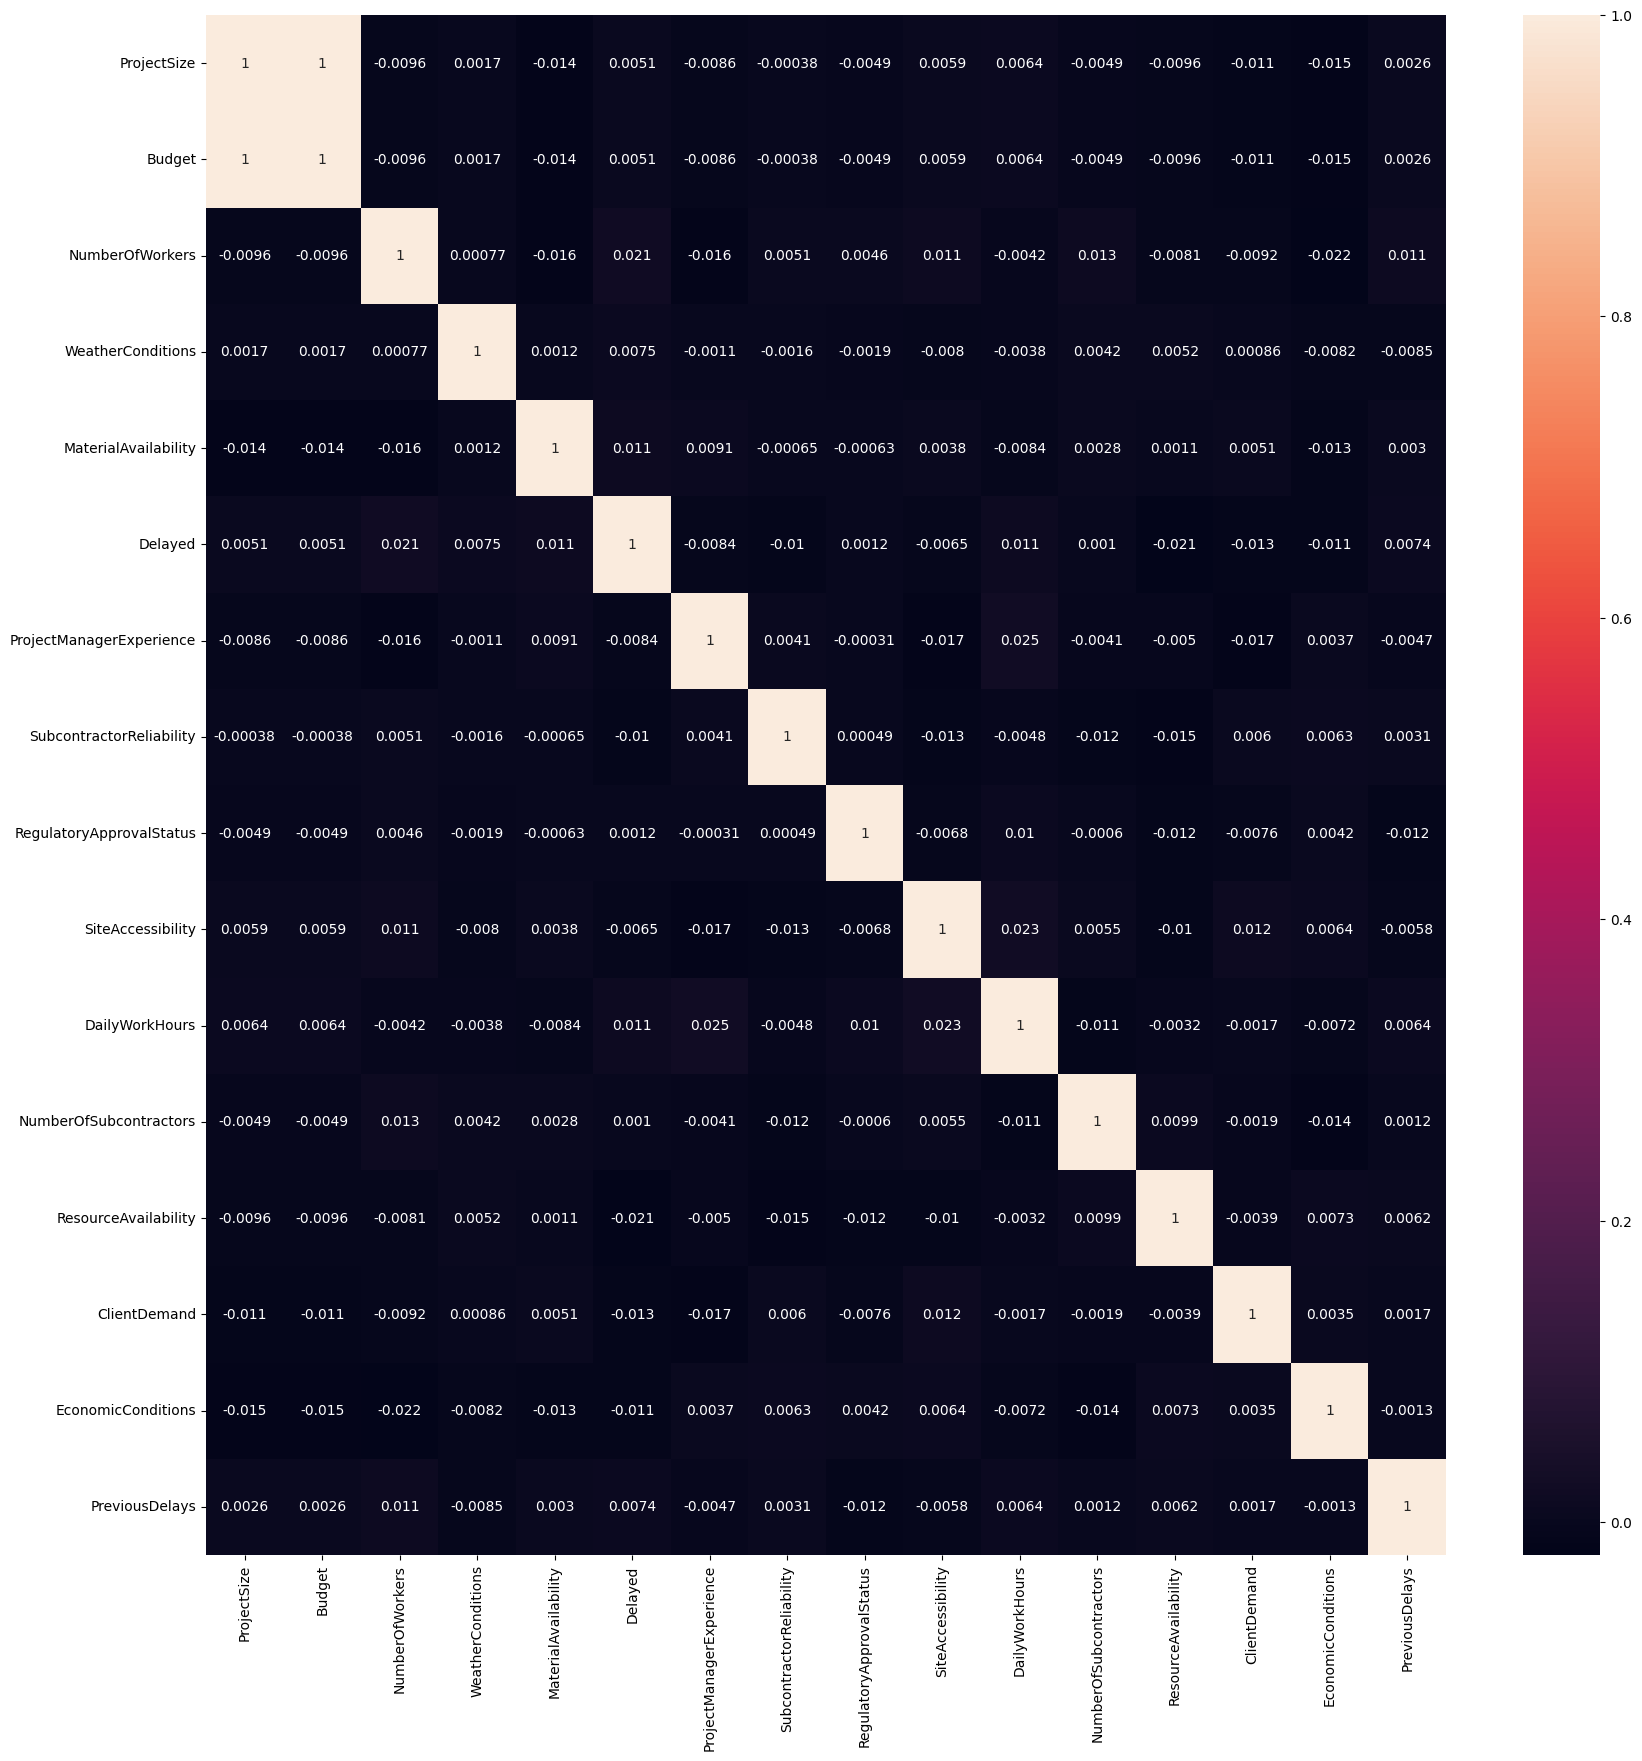

In [43]:
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True)

In [45]:
# split x,y
X=df.drop("Delayed",axis=1)
y=df[["Delayed"]]

## Feature selections

In [51]:
from sklearn.feature_selection import SelectKBest, f_classif

In [58]:
selector = SelectKBest(score_func=f_classif, k=10)
sc = selector.fit_transform(X,y)
selected_features = X.columns[selector.get_support()]
selected_features

C:\Users\USER\anaconda3\envs\python39\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Index(['NumberOfWorkers', 'WeatherConditions', 'MaterialAvailability',
       'ProjectManagerExperience', 'SubcontractorReliability',
       'DailyWorkHours', 'ResourceAvailability', 'ClientDemand',
       'EconomicConditions', 'PreviousDelays'],
      dtype='object')

In [60]:
X_selected=X[selected_features]

In [72]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_selected,y,test_size=0.2,random_state=0)

## Model building

In [77]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

C:\Users\USER\anaconda3\envs\python39\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [79]:
prediction=rf.predict(X_test)

In [80]:
from sklearn.metrics import classification_report

In [82]:
print(classification_report(prediction,y_test))

              precision    recall  f1-score   support

         0.0       0.97      0.70      0.82      1935
         1.0       0.04      0.35      0.07        65

    accuracy                           0.69      2000
   macro avg       0.50      0.53      0.44      2000
weighted avg       0.94      0.69      0.79      2000

